# **Predicting Sentiment of Tweets: Analyzing Airline Travelers' Experiences**

### **AI Certification course Project**

In the age of social media, platforms like Twitter serve as a vibrant repository of public opinion and sentiment. This study aims to predict the sentiment of text data, specifically focusing on how air travelers express their experiences on Twitter. The data used in this study was sourced from Kaggle, sampled into training and testing. It can be found at Kaggle: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment . This dataset, contributed by Crowdflower, comprises a comprehensive collection of tweets directed at various US airlines, capturing the sentiments of travelers regarding their flying experiences. For example "@VirginAmerica So excited for my first cross country flight LAX to MCO I've heard nothing but great things about Virgin America" is a tweet in this data set and it sentiment label is positive.

**Overview of the Dataset**

The dataset includes approximately 14,640 tweets, each labeled with one of three sentiments: positive, neutral, or negative. Additionally, the dataset provides valuable metadata such as the airline name, the tweet creation time, and the tweet's geographical location.  This rich dataset allows for a multifaceted analysis of travelers' sentiments and the factors influencing these sentiments, however, my focus is only on the text and what sentiment the text implies.

**Objectives of the Study**

The primary objective of this study is to develop a machine learning model capable of accurately predicting the sentiment of a given tweet. By achieving this, we can gain insights into the overall perception of different airlines and identify specific aspects of the travel experience that elicit strong emotions, be they positive or negative. The predictive model can be used by airlines to monitor customer satisfaction in real-time, enabling them to address issues promptly and improve their services.








In [ ]:
#https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

The data has been pre-loaded, randomly sampled into training and test sets, and saved in a folder as Tweets-test and Tweets-train. They are unzipped files below.

In [1]:
!unzip /content/dataset-20230414t081327z-001_bme_qmx4jbzh.zip
!unzip /content/Dataset/Tweets-test.zip
!unzip /content/Dataset/Tweets-train.zip

Archive:  /content/dataset-20230414t081327z-001_bme_qmx4jbzh.zip
  inflating: Dataset/Tweets-test.zip  
  inflating: Dataset/Tweets-train.zip  
Archive:  /content/Dataset/Tweets-test.zip
  inflating: Tweets-test.csv         
Archive:  /content/Dataset/Tweets-train.zip
  inflating: Tweets-train.csv        


In [106]:
#pip install emoji


In [3]:
import pandas as pd
import numpy as np
import random
import re
import emoji
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Read datasets

In [110]:
df_train = pd.read_csv('/content/Tweets-train.csv')
df_test = pd.read_csv('//content/Tweets-test.csv')

In [111]:
print("Total observations:",df_train.shape[0] + df_test.shape[0])

Total observations: 14640


In [ ]:
df_train.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
1,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
2,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
3,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
4,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


In [ ]:
df_test.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570031758546063361,negative,1.0000,Customer Service Issue,1.0000,American,NaN,msofka,NaN,0,@AmericanAir why did you drop my call. Why don...,NaN,2015-02-23 17:25:36 -0800,"Cleveland, OH",Central Time (US & Canada)
1,569230567759327233,negative,1.0000,Bad Flight,0.6703,US Airways,NaN,POnions,NaN,0,@USAirways thanks for the seat that doesn't re...,NaN,2015-02-21 12:21:57 -0800,"CT, USA",Central Time (US & Canada)
2,569847788986462209,negative,1.0000,Late Flight,0.6684,American,NaN,JoshSeefried,NaN,0,@AmericanAir wasn't just a delay. Your counter...,NaN,2015-02-23 05:14:34 -0800,NaN,Central Time (US & Canada)
3,569666352794898432,positive,0.6600,NaN,0.0000,United,NaN,anoyes,NaN,0,@united social media team is on point on #Osca...,NaN,2015-02-22 17:13:37 -0800,"San Francisco, CA",Eastern Time (US & Canada)
4,570279368766959616,neutral,0.6739,NaN,NaN,American,NaN,jjqb1,NaN,0,@AmericanAir These birds could fly to South Am...,NaN,2015-02-24 09:49:31 -0800,NaN,Buenos Aires


**Data Preprocessing**

Data preprocessing is a crucial step in sentiment analysis. The raw text data from tweets often contains noise in the form of hashtags, mentions, URLs, and special characters. To ensure the model learns from clean and relevant data, I perform several preprocessing steps:



1.  Removal of mentions: Mentions (e.g., @airline) and URLs are removed as they do not contribute to the sentiment analysis
2.  Tokenization: The text is split into individual tokens (words) (e.g, "I love flying with united airline" will be tokenized to [I, love, flying, with, unnnited, airline, ]), which facilitates further processing.
3.  Stopwords Removal: Commonly used words (e.g., "the", "is", "in") that do not carry significant meaning are removed.
4.  Lemmatization/Stemming: Words are reduced to their base or root form (e.g., "flying" to "fly") to ensure uniformity. Emojis are special charaters but could convey significant information for sentiment analysis, hence are not removed.

In [112]:
## function for selecting only the text and sentiment.
def select_text_sentiment(df):
  return df[['text', 'airline_sentiment']]

train_data = select_text_sentiment(df_train)
train_data.head()
#print(train_data.shape())
#print(test_data.shape())

,text,airline_sentiment
0,@VirginAmerica plus you've added commercials t...,positive
1,@VirginAmerica I didn't today... Must mean I n...,neutral
2,@VirginAmerica it's really aggressive to blast...,negative
3,@VirginAmerica and it's a really big bad thing...,negative
4,"@VirginAmerica yes, nearly every time I fly VX...",positive


airline_sentiment
negative    6670
neutral     2248
positive    1722
dtype: int64


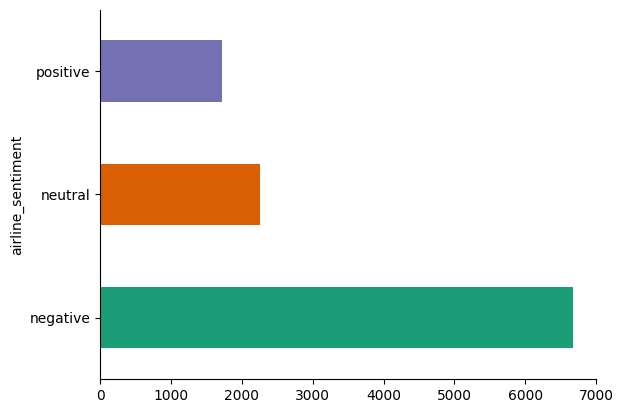

In [113]:
## Distribution of sentiment
print(train_data.groupby('airline_sentiment').size())
train_data.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

The data is inbalance. Negative sentiments are more than three times of positive sentiments and about 4 times of neutral. When you have an imbalanced dataset, where one class significantly outnumbers the others, machine learning models tend to become biased towards the majority class. This can result in poor performance, especially for the minority classes. I will up sample the minority class using SMOTE.

**SMOTE**, which stands for Synthetic Minority Over-sampling Technique, is an algorithm used to balance datasets by increasing the number of samples in the minority class. Instead of simply duplicating existing minority samples, SMOTE generates new, synthetic samples by selecting pairs of similar samples in the minority class and creating new samples along the line that connects them. This approach helps to create a more balanced dataset without overfitting to the few existing minority samples, thus improving the performance of machine learning models by making them less biased towards the majority class. Note SMOTE operates only on numerical data, hence I will apply it after vectorizing the text data.









In [115]:
## function to observe special characters including emojis for random tweets

def observe_tweets(df, sentiment, num_tweets, text_col):

    sentiment_df = df[df['airline_sentiment'] == sentiment]

    random_tweets = random.sample(list(sentiment_df[text_col]), num_tweets)

    for tweet in random_tweets:
        print(f"Tweet: {tweet}")
        print(f"Contains @: {'@' in tweet}")
        print(f"Contains link: {re.search(r'http[s]?://', tweet) is not None}")
        print(f"Contains punctuation: {any(p in tweet for p in '.,!?;')}")


        def extract_emojis(text):
            return [char for char in text if char in emoji.EMOJI_DATA]

        emojis_in_tweet = extract_emojis(tweet)
        print(f"Contains emoji: {bool(emojis_in_tweet)}")
        print(f"Emojis: {emojis_in_tweet}")


        emoticons = [':)', ':(', ':D', ':P']
        contains_emoticon = any(e in tweet for e in emoticons)
        print(f"Contains emoticon: {contains_emoticon}")
        print("-" * 20)


for sentiment in train_data['airline_sentiment'].unique():
  print(f"\nObserving tweets for {sentiment} sentiment")
  observe_tweets(train_data, sentiment, num_tweets=10, text_col = "text")


Observing tweets for positive sentiment
Tweet: @SouthwestAir kudos to the crew of flight 1050 to GRR for making a very special memory for a sweet young passenger, and her Momma. Well done
Contains @: True
Contains link: False
Contains punctuation: True
Contains emoji: False
Emojis: []
Contains emoticon: False
--------------------
Tweet: @united Kurt and the crew on UA1745 were amazing today. They made my son's birthday with their kindness. Hope to fly with them again soon!
Contains @: True
Contains link: False
Contains punctuation: True
Contains emoji: False
Emojis: []
Contains emoticon: False
--------------------
Tweet: @VirginAmerica Congrats VX on the new route! ✈️🎉
Contains @: True
Contains link: False
Contains punctuation: True
Contains emoji: True
Emojis: ['✈', '🎉']
Contains emoticon: False
--------------------
Tweet: @united Thank you! Off to LA to do something very special.
Contains @: True
Contains link: False
Contains punctuation: True
Contains emoji: False
Emojis: []
Contai

In [120]:
# function to clean the uneccessary character. Emojis might convey sentiment, hence are not removed
def clean_text(text):
  text = re.sub(r'http[s]?://\S+', '', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'[.,!?;]', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\s+', ' ', text)
  text = ' '.join(text.split())
  text = text.lower()
  return text

train_data['cleaned_text'] = train_data['text'].apply(lambda x: clean_text(x))



for sentiment in train_data['airline_sentiment'].unique():
  print(f"\nObserving tweets for {sentiment} sentiment")
  observe_tweets(train_data, sentiment, num_tweets=100, text_col="cleaned_text")

<ipython-input-120-643788bb9b7d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cleaned_text'] = train_data['text'].apply(lambda x: clean_text(x))



Observing tweets for positive sentiment
Tweet: thanks sent a dm to you let me know if oyu need any additional information
Contains @: False
Contains link: False
Contains punctuation: False
Contains emoji: False
Emojis: []
Contains emoticon: False
--------------------
Tweet: i still think american airlines is greati would just like to be treated better loyal customers first right
Contains @: False
Contains link: False
Contains punctuation: False
Contains emoji: False
Emojis: []
Contains emoticon: False
--------------------
Tweet: provide a voucher for one of my customers and i will tweet about you all day long earnedmybusiness
Contains @: False
Contains link: False
Contains punctuation: False
Contains emoji: False
Emojis: []
Contains emoticon: False
--------------------
Tweet: have sent you a dm with the details thanks
Contains @: False
Contains link: False
Contains punctuation: False
Contains emoji: False
Emojis: []
Contains emoticon: False
--------------------
Tweet: haha i had a boa

In [121]:
## Most common 15 words for each sentiment
def get_word_distribution(df, sentiment):
  text = " ".join(df[df['airline_sentiment'] == sentiment]['cleaned_text'].tolist())
  words = nltk.word_tokenize(text)
  return FreqDist(words)

for sentiment in train_data['airline_sentiment'].unique():
  print(f"\nWord distribution for {sentiment} sentiment:")
  word_dist = get_word_distribution(train_data, sentiment)
  print(word_dist.most_common(15))



Word distribution for positive sentiment:
[('the', 689), ('to', 675), ('you', 632), ('for', 493), ('i', 449), ('thanks', 446), ('a', 372), ('thank', 335), ('and', 304), ('my', 262), ('flight', 261), ('in', 236), ('on', 233), ('your', 186), ('it', 184)]

Word distribution for neutral sentiment:
[('to', 1184), ('i', 843), ('the', 729), ('a', 588), ('you', 530), ('on', 472), ('for', 442), ('flight', 422), ('my', 387), ('is', 371), ('in', 344), ('and', 328), ('can', 305), ('it', 255), ('of', 245)]

Word distribution for negative sentiment:
[('to', 4318), ('the', 3014), ('i', 2605), ('a', 2300), ('flight', 2070), ('and', 2039), ('on', 2005), ('for', 1996), ('you', 1806), ('my', 1718), ('is', 1525), ('in', 1254), ('of', 1137), ('not', 1018), ('me', 988)]


In [122]:
# remove stop words using stopwords from NLP
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return " ".join(filtered_words)

train_data['cleaned_text'] = train_data['cleaned_text'].apply(lambda x: remove_stopwords(x))
train_data.head()


<ipython-input-122-55d4e1f1e1cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cleaned_text'] = train_data['cleaned_text'].apply(lambda x: remove_stopwords(x))


,text,airline_sentiment,cleaned_text
0,@VirginAmerica plus you've added commercials t...,positive,plus youve added commercials experience tacky
1,@VirginAmerica I didn't today... Must mean I n...,neutral,didnt today must mean need take another trip
2,@VirginAmerica it's really aggressive to blast...,negative,really aggressive blast obnoxious entertainmen...
3,@VirginAmerica and it's a really big bad thing...,negative,really big bad thing
4,"@VirginAmerica yes, nearly every time I fly VX...",positive,yes nearly every time fly vx ear worm wont go ...


In [123]:
# lemmatization of the clean_text

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()
  words = nltk.word_tokenize(text)
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  return " ".join(lemmatized_words)

train_data['cleaned_text'] = train_data['cleaned_text'].apply(lambda x: lemmatize_text(x))
train_data.shape



# Test set preprocessing
test_data = select_text_sentiment(df_test)
test_data['cleaned_text'] = test_data['text'].apply(lambda x: clean_text(x))
test_data['cleaned_text'] = test_data['cleaned_text'].apply(lambda x: remove_stopwords(x))
test_data['cleaned_text'] = test_data['cleaned_text'].apply(lambda x: lemmatize_text(x))
test_data.shape

label_encoder = LabelEncoder()
train_data['sentiment_encoded'] = label_encoder.fit_transform(train_data['airline_sentiment'])
test_data['sentiment_encoded'] = label_encoder.transform(test_data['airline_sentiment'])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-123-e38f78f6610d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cleaned_text'] = train_data['cleaned_text'].apply(lambda x: lemmatize_text(x))
<ipython-input-123-e38f78f6610d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['cleaned_text'] = test_data['text'].apply(lambda x: clean_text(x))
<ipython-input-123-e38f78f6610d>:20: SettingWithCopyWarning: 
A

# **Machine Learning Model Development**

When predicting sentiment in text, various machine learning algorithms can be used to classify the sentiment of tweets. Here, I explore two algorithms: Naive Bayes Classifier and Support Vector Machines (SVM). Deep Learning Models like Long Short-Term Memory (LSTM) networks and Bidirectional Encoder Representations from Transformers (BERT) could also be explored. Each method has its strengths and operates in unique ways to handle the task of text classification.

**Naive Bayes Classifier**

The Naive Bayes Classifier is a simple yet powerful probabilistic algorithm used for text classification. It’s based on Bayes' Theorem and works well with large datasets.

The algorithm calculates the probability that a given piece of text (like a tweet) belongs to a particular class (e.g., positive, negative, or neutral sentiment). It assumes that the presence of a particular word in a tweet is independent of the presence of any other word. Although this "naive" assumption isn’t always true in real life, the classifier often performs well in practice.

During training, the algorithm learns the probability of each word occurring in tweets of each sentiment. For example, it might learn that the word "great" is more likely to appear in positive tweets.

When predicting sentiment, the classifier multiplies the probabilities of the individual words in the tweet belonging to each class and chooses the class with the highest probability. Despite its simplicity, it works well for text classification.
Example: imagine you have tweets: "I love this airline!" and "I hate this airline!". The classifier learns that "love" is associated with positive sentiment and "hate" with negative sentiment. Given a new tweet, it calculates the probabilities and classifies it accordingly.

In [127]:
# vectorize the text column using countvectorizer
from imblearn.over_sampling import SMOTE
vectorizer = CountVectorizer(max_features=4500, stop_words='english')
X_train = vectorizer.fit_transform(train_data['cleaned_text'])
X_train = X_train.toarray()
y_train = train_data['sentiment_encoded']



# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Original shape:", X_train.shape, y_train.shape)
print("Resampled shape:", X_resampled.shape, y_resampled.shape)
print("Original class distribution:", np.bincount(y_train))
print("Resampled class distribution:", np.bincount(y_resampled))



X_test = vectorizer.transform(test_data['cleaned_text'])
X_test = X_test.toarray()
y_test = test_data['sentiment_encoded']

print(X_test.shape, y_test.shape)



Original shape: (10640, 4500) (10640,)
Resampled shape: (20010, 4500) (20010,)
Original class distribution: [6670 2248 1722]
Resampled class distribution: [6670 6670 6670]
(4000, 4500) (4000,)


In [128]:
## multinomial naive bayes model for the sentiment classification

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_resampled, y_resampled)




MultinomialNB()

**Evaluation Metrics**

To evaluate the performance of our models, we use metrics such as accuracy, precision, recall, and F1-score. These metrics provide a comprehensive understanding of the model's ability to correctly classify the sentiment of tweets.

## Loading and applying the cleaning process to the text data before performing predictions

Accuracy: 0.7710
Precision: 0.7724
Recall: 0.7710
F1-score: 0.7715


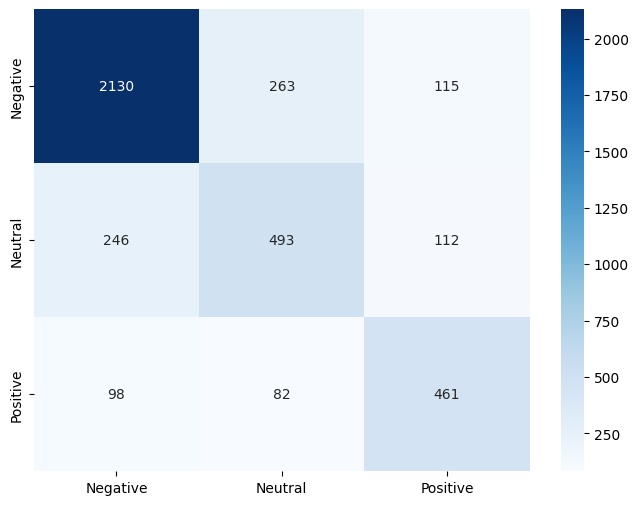

In [131]:
# Calculate evaluation metrics

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.show()

**Support Vector Machines (SVM)**

Support Vector Machines (SVM) is a powerful and versatile supervised learning algorithm that is particularly effective for text classification tasks.

SVM works well in high-dimensional spaces where data points are represented by vectors (e.g., word counts or word embeddings). The core idea of SVM is to find the optimal hyperplane (a decision boundary) that best separates the data points of different classes. In two dimensions, this is a line, but in higher dimensions, it’s a plane or hyperplane.

SVM aims to maximize the margin, which is the distance between the hyperplane and the closest data points from each class (called support vectors). A larger margin generally leads to better generalization to new data.

SVM can handle non-linear separation by using kernel functions, which transform the data into a higher-dimensional space where a linear separation is possible.

It Works well with high-dimensional data and is less affected by overfitting. SVM be used for both linear and non-linear classification problems through the use of different kernel functions.

Imagine plotting tweets in a space where positive tweets are on one side and negative tweets on the other. SVM finds the best line (or hyperplane) that separates these two groups with the maximum margin.

In [132]:
from sklearn.svm import SVC
svm_model = SVC(kernel= 'rbf')

svm_model.fit(X_resampled, y_resampled)




SVC()

SVM Accuracy: 0.7588
SVM Precision: 0.7482
SVM Recall: 0.7588
SVM F1-score: 0.7447


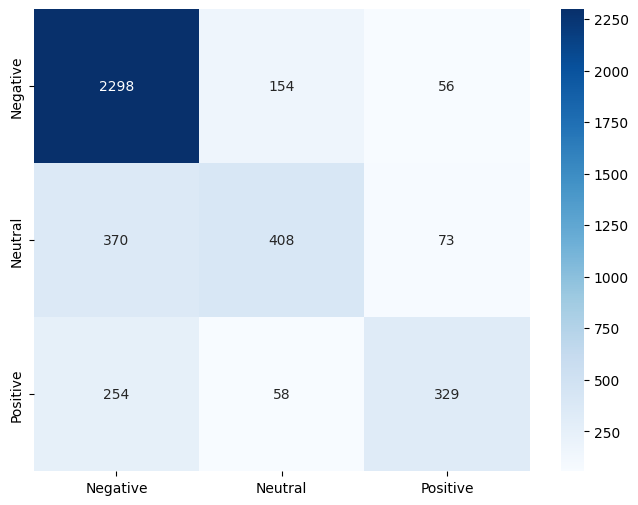

In [133]:
y_pred_svm_rbf = svm_model.predict(X_test)

accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_test, y_pred_svm_rbf, average='weighted')
recall_svm_rbf = recall_score(y_test, y_pred_svm_rbf, average='weighted')
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf, average='weighted')

print(f"SVM Accuracy: {accuracy_svm_rbf:.4f}")
print(f"SVM Precision: {precision_svm_rbf:.4f}")
print(f"SVM Recall: {recall_svm_rbf:.4f}")
print(f"SVM F1-score: {f1_svm_rbf:.4f}")

plt.figure(figsize=(8, 6))
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
sns.heatmap(cm_svm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.show()

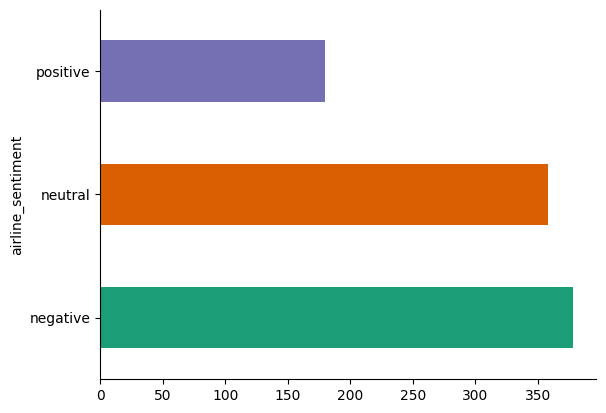

In [136]:
# Missed classified sentiments

misclassified_df = test_data[y_test != y_pred]
misclassified_df.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)



In [142]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None  )
misclassified_df[['airline_sentiment', 'text', 'cleaned_text']]


,airline_sentiment,text,cleaned_text
4,neutral,@AmericanAir These birds could fly to South America for example #Argentina,bird could fly south america example argentina
9,negative,@SouthwestAir thanks for the response - flight time has passed - rebooked now,thanks response flight time passed rebooked
11,negative,@AmericanAir I was flying from Ft Lauderdale FL to Seattle WA on the 02/28/2015 until the 03/03/2015 and they don't want to honor my flight.,flying ft lauderdale fl seattle wa 02282015 03032015 dont want honor flight
13,neutral,@southwestair Winter Weather for Denver extended for tomorrow by chance? Even to Late Flightr in the day would be super helpful.,winter weather denver extended tomorrow chance even late flightr day would super helpful
18,negative,"@SouthwestAir not terribly inspired to call ""customer service"" in the future now.",terribly inspired call customer service future
19,positive,Lmfaooo “@JetBlue: Our fleet's on fleek. http://t.co/1G9RnmYUQe”,lmfaooo fleet fleek
20,neutral,"@AmericanAir good morning, please let me know if I will be able to get those luggage tags. Tx!",good morning please let know able get luggage tag tx
21,positive,@JetBlue to offer service from Daytona Beach to New York - Albany Business Review http://t.co/dUhBJ41jHx,offer service daytona beach new york albany business review
29,negative,@SouthwestAir thanks for taking such good care of my luggage... http://t.co/PIvxean3jY,thanks taking good care luggage
30,neutral,"@JetBlue @shannonwoodward I'll be checking often. Most probably when they hand the oscars out to the nerds, geeks and badly dressed.",ill checking often probably hand oscar nerd geek badly dressed


**Insights, suggestions and Applications**

Analyzing the sentiment of tweets directed at airlines offers valuable insights into customer satisfaction and areas needing improvement. Frequent negative sentiments about delays or customer service can prompt airlines to address these issues more effectively, while positive sentiments can highlight strengths that can be leveraged in marketing campaigns. Insights from the misclassified sentiments reveal that negative sentiments are often misclassified. Many of these misclassified negative texts are complex in meaning. For example, a tweet like "thanks for the response - flight time has passed - rebooked now" is accurately labeled as negative sentiment but classified as positive. One possible reason for this misclassification could be that the phrase "thanks for the response" carries more positive connotations, overshadowing the overall negative sentiment of the tweet. Most of the misclassified positive sentiments contain more emojis than sentences or words.

In the context of these complex texts, simple machine learning models like Naive Bayes Classifiers and SVM might perform better at classifying sentiments. Extensive text cleaning and efficient text-to-numeric representation could help improve these ML models. Deep learning models like LSTM are well-suited to handle complexity in text. The Multinomial Naive Bayes (MNB) model is faster in terms of training and has also performed slightly better in prediction than the SVM, which takes longer to train.

From an application perspective, real-time sentiment analysis can be integrated into customer service dashboards, enabling airlines to promptly respond to negative feedback and enhance the overall travel experience.

**Conclusion**

This study underscores the significance of sentiment analysis in understanding customer perceptions and improving service quality in the airline industry. By leveraging the Twitter Airline Sentiment dataset from Kaggle, the goal is to develop robust predictive models that not only classify sentiment with high accuracy but also provide actionable insights for airlines to enhance their services and ultimately improve customer satisfaction. As social media continues to shape public opinion, sentiment analysis will remain a vital tool for businesses to stay attuned to their customers' needs and expectations.